<a href="https://colab.research.google.com/github/areumham/tiny_python_projects/blob/master/result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow keras


In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_01.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")



파일이 존재하지 않습니다. 경로를 확인하세요.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os


def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [ ]:
def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model

In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


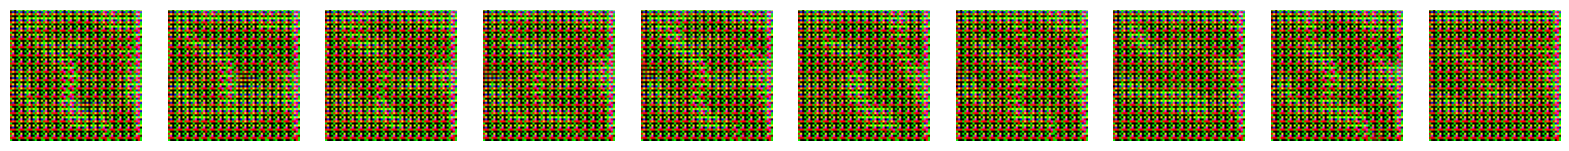

In [ ]:
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_01.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_02.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


파일이 존재합니다.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os



Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


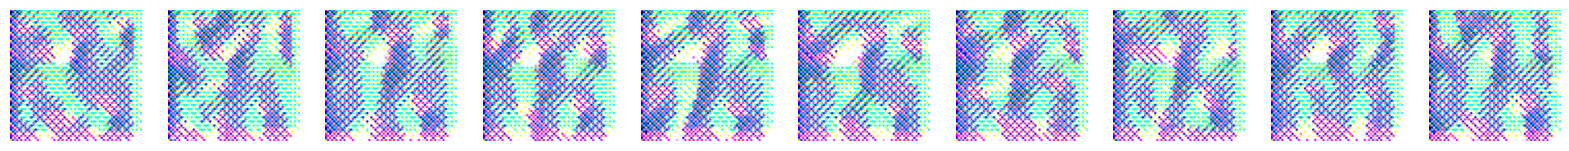

In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_02.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)


In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_03.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

파일이 존재합니다.


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


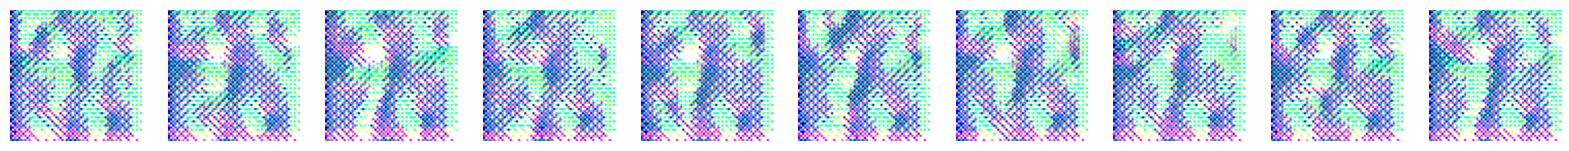

In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_03.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_04.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step


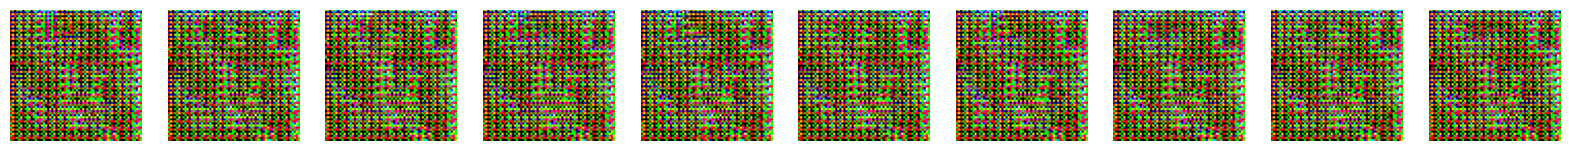

In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_04.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_05.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

파일이 존재합니다.


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


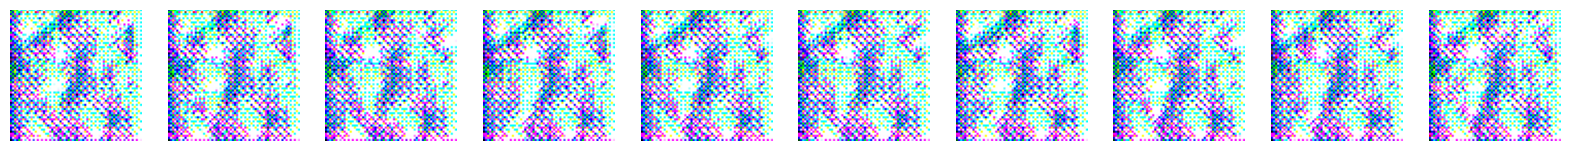

In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_05.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_06.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')


파일이 존재합니다.


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


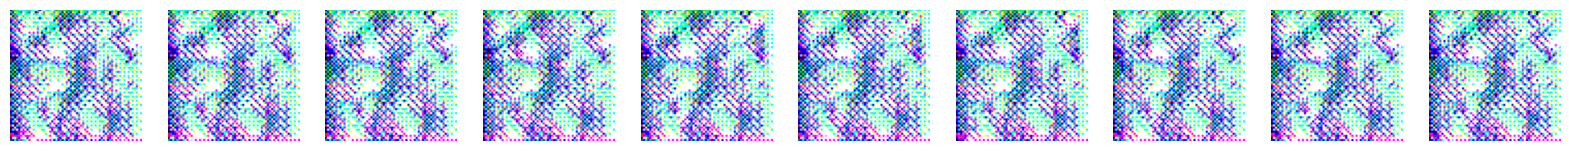

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_06.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_07.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

파일이 존재합니다.


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


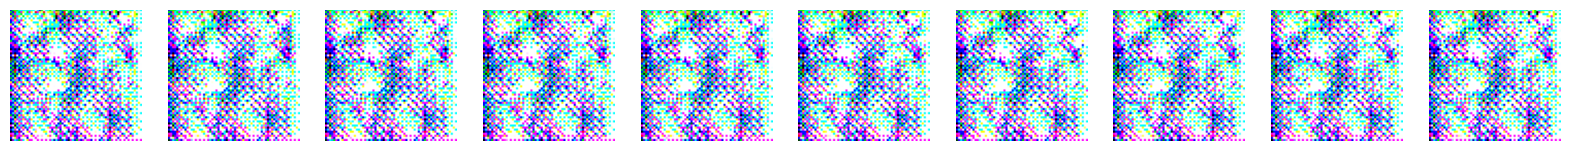

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_07.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_08.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

파일이 존재합니다.


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


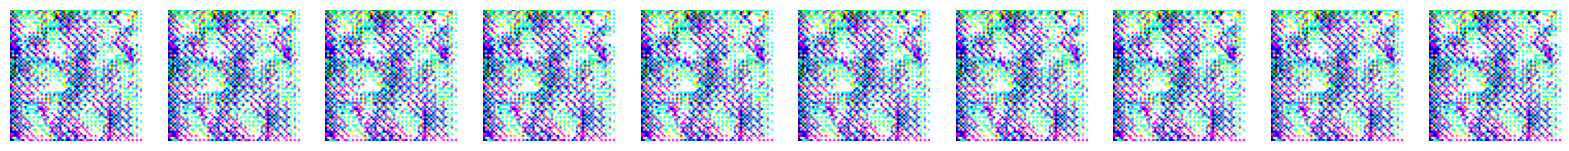

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_08.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_09.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os





파일이 존재합니다.


Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


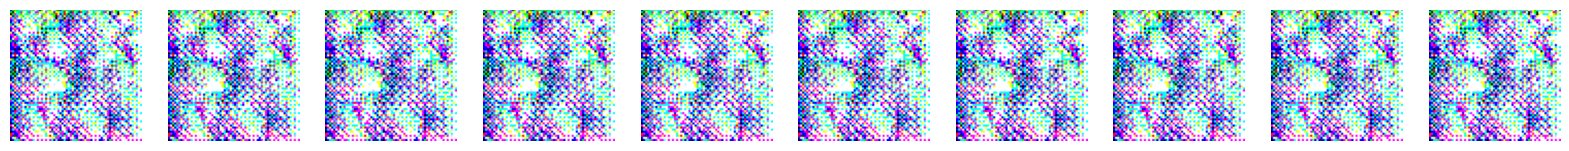

In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_09.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)

파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


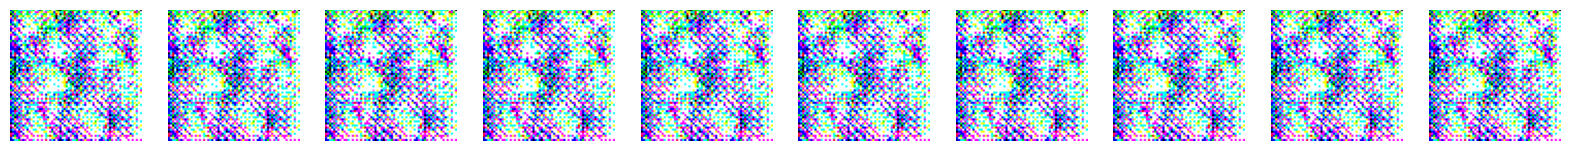

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_10.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_10.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


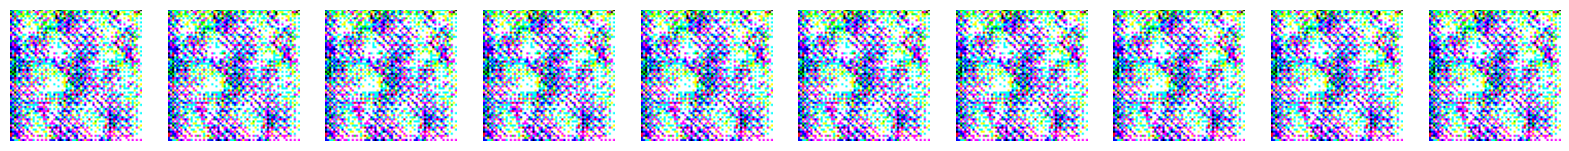

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_11.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_11.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step


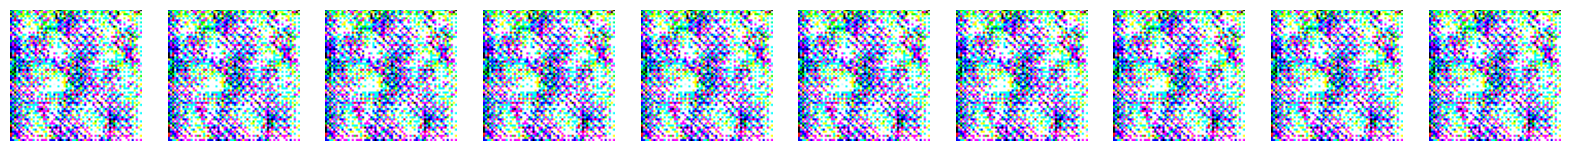

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_12.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_12.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


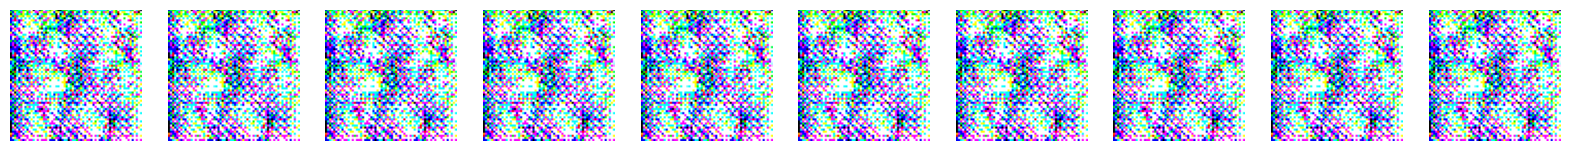

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_13.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_13.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


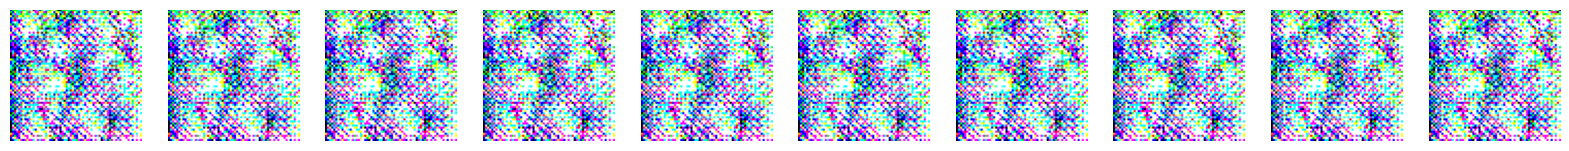

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_14.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_14.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


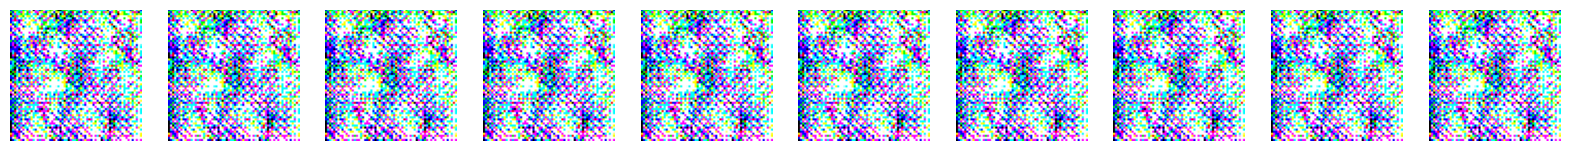

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_15.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_15.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


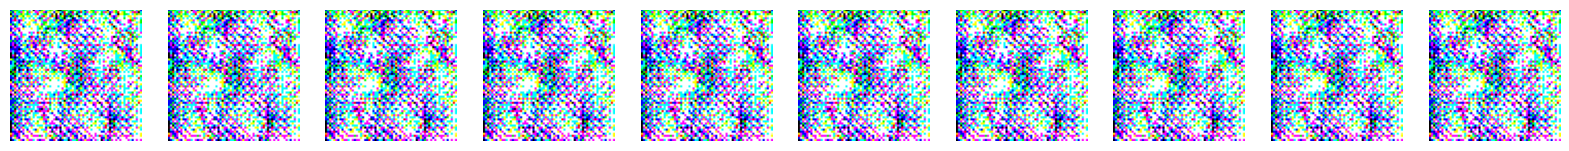

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_16.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_16.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


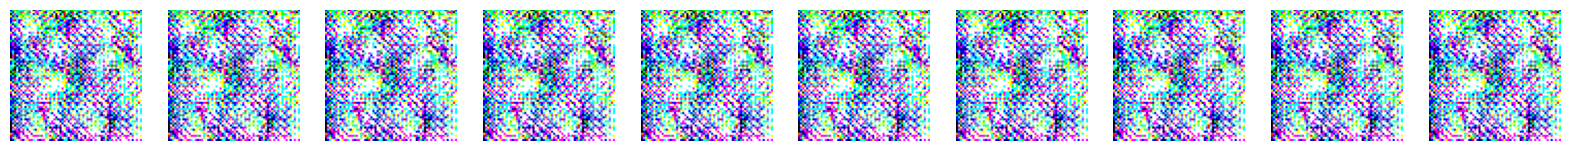

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_17.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_17.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


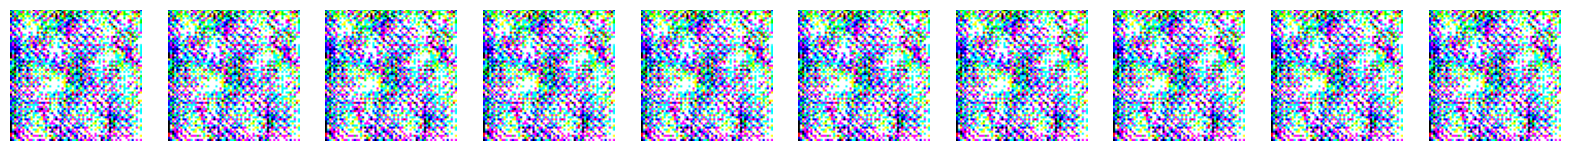

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_18.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_18.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


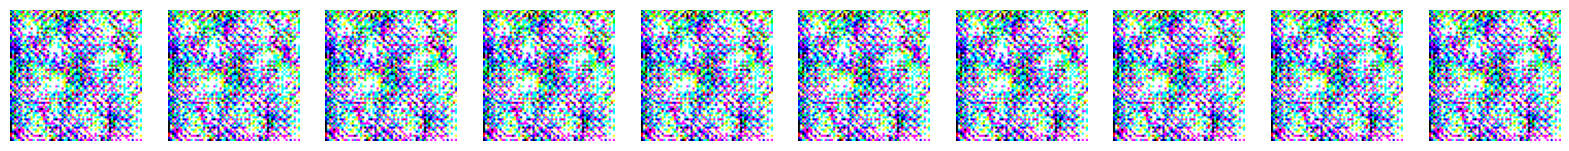

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_19.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_19.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


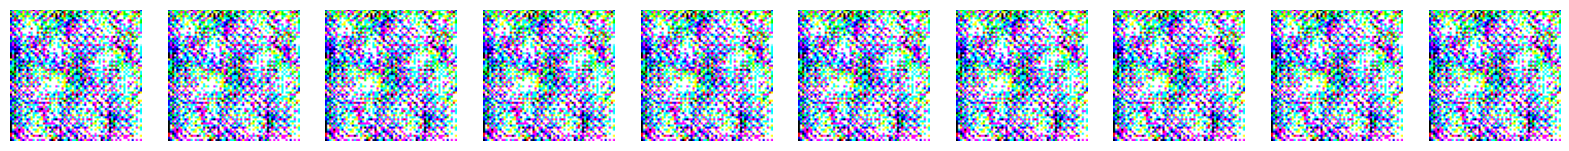

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_20.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_20.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


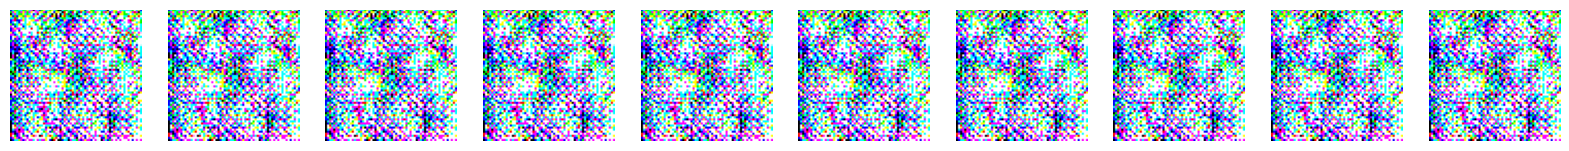

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_21.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_21.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


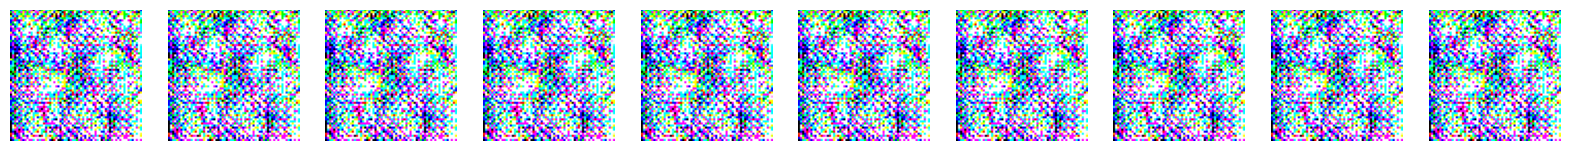

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_22.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_22.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



가중치 평균: -0.28173467652499995
가중치 표준편차: 1.108944888987526


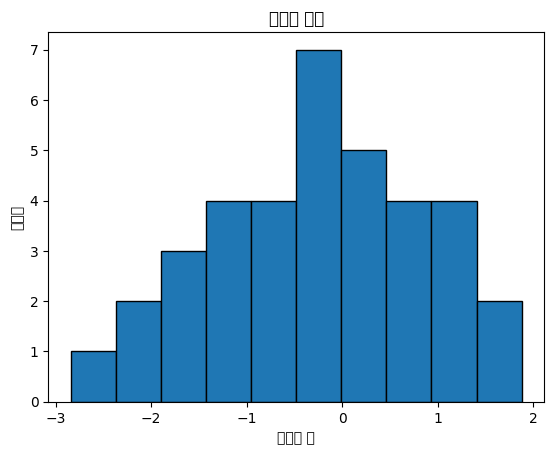

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 제공된 가중치 배열
weights = np.array([
    -1.09798268e+00, -2.01526707e+00,  9.70864620e-01,  5.17949078e-01,
    -2.84237943e+00, -1.69989198e+00,  1.33205878e+00,  8.03261185e-01,
     1.05615692e+00, -1.82040454e-01, -2.10745215e+00,  5.79316162e-02,
     4.90806414e-01,  4.08810050e-01, -4.26837912e-01, -4.39199611e-01,
     3.00927465e-01,  1.87874893e+00,  1.39954484e+00, -1.55468754e+00,
    -5.09841924e-01,  9.01845599e-02, -3.92307488e-01, -1.22170412e+00,
     1.44452874e+00,  7.94739916e-01, -7.67655817e-01, -1.15813252e-01,
     1.88002725e-01, -1.15301968e+00, -4.13661431e-01, -1.30627488e+00,
    -8.74540780e-01, -1.78050129e+00, -4.62757703e-01, -5.13147002e-01
])

# 가중치 통계
mean = np.mean(weights)
std_dev = np.std(weights)
print(f"가중치 평균: {mean}")
print(f"가중치 표준편차: {std_dev}")

# 히스토그램 시각화
plt.hist(weights, bins=10, edgecolor='black')
plt.title('가중치 분포')
plt.xlabel('가중치 값')
plt.ylabel('빈도수')
plt.show()


파일이 존재합니다.
Checkpoint 파일이 존재합니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


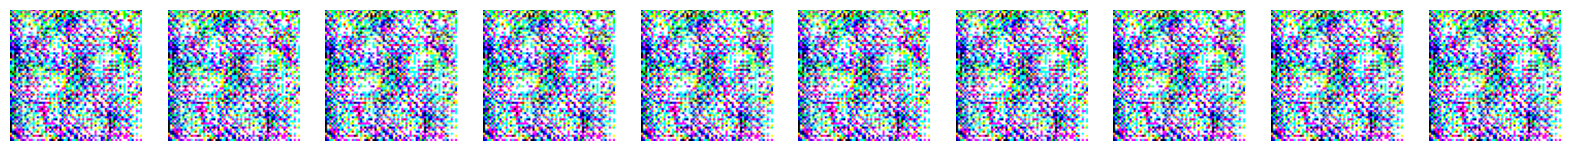

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_23.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_23.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재하지 않습니다. 경로를 확인하세요.
Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.
1/1 [==============================] - 1s 994ms/step


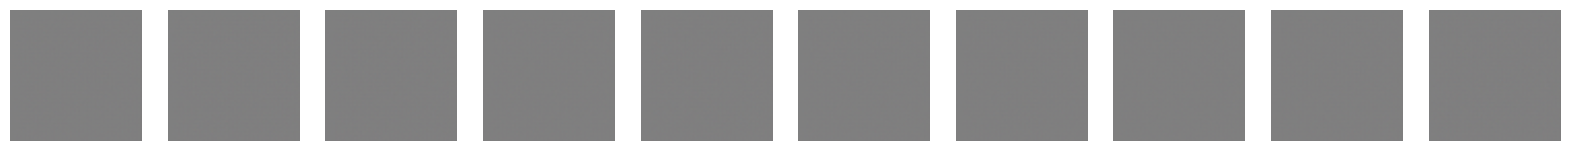

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_24.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_24.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



파일이 존재하지 않습니다. 경로를 확인하세요.
Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.


1/1 [==============================] - 1s 614ms/step


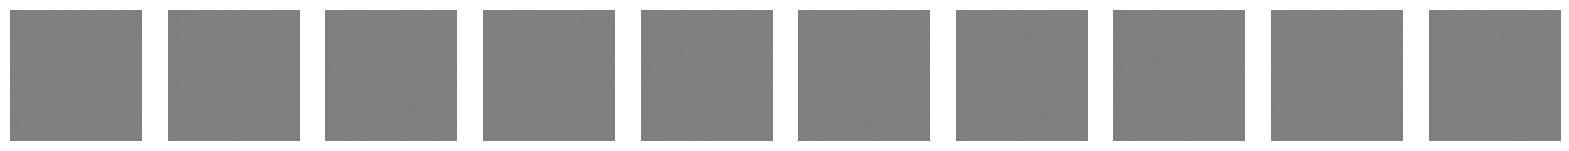

In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_25.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_25.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_24.h5'
# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")

파일이 존재하지 않습니다. 경로를 확인하세요.


Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.


1/1 [==============================] - 1s 1s/step


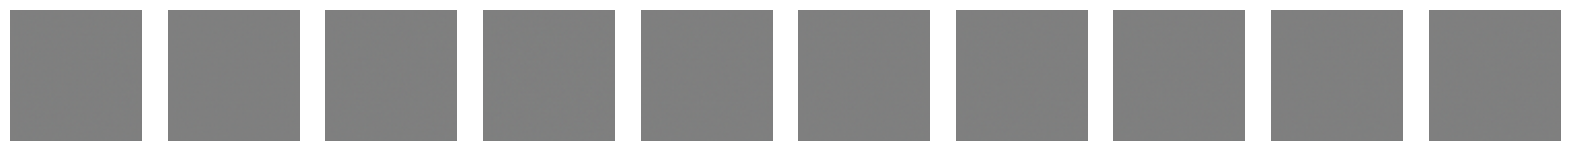

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_27.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)



In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_27.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")

파일이 존재하지 않습니다. 경로를 확인하세요.


파일이 존재하지 않습니다. 경로를 확인하세요.
Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.
1/1 [==============================] - 1s 573ms/step


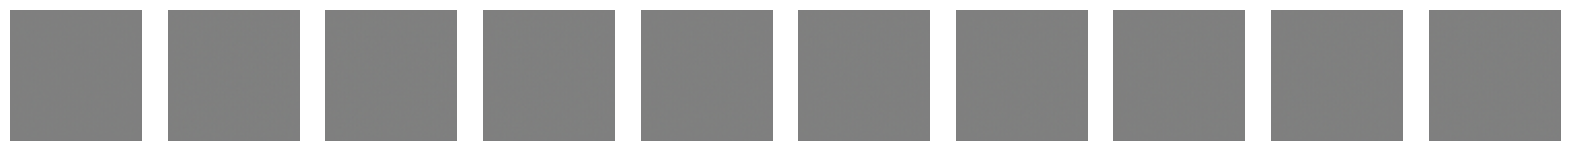

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_27.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)


In [ ]:
import os

# 파일 경로 설정
checkpoint_path = '/content/drive/My Drive/gan_checkpoint_epoch_26.h5'

# 파일 존재 여부 확인
if os.path.exists(checkpoint_path):
    print("파일이 존재합니다.")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
latent_dim = 100
generator_model = build_generator(latent_dim)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)

# 옵티마이저 및 손실 함수 설정
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 체크포인트 경로
checkpoint_path = "/content/drive/My Drive/gan_checkpoint_epoch_26.h5"

# 가중치 로드
if os.path.exists(checkpoint_path):
    print("Checkpoint 파일이 존재합니다.")
    gan_model.load_weights(checkpoint_path)
else:
    print("Checkpoint 파일이 존재하지 않습니다. 경로를 확인하세요.")

# 모델 사용 예시 (노이즈 샘플을 생성하여 이미지를 생성)
def generate_noise_samples(batch_size, latent_dim):
    return np.random.normal(0, 1, (batch_size, latent_dim))

# 노이즈 샘플 생성
noise_samples = generate_noise_samples(10, latent_dim)

# 생성된 이미지
generated_images = generator_model.predict(noise_samples)

# 생성된 이미지 시각화 (예시)
def plot_generated_images(images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow((images[i] + 1) / 2)  # 이미지 값을 0-1 범위로 스케일링
        plt.axis('off')
    plt.show()

# 생성된 이미지 플로팅
plot_generated_images(generated_images)
